In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads = pd.read_csv('../Advertising.csv',index_col=0)
ads

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [17]:
type(ads)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Sales')

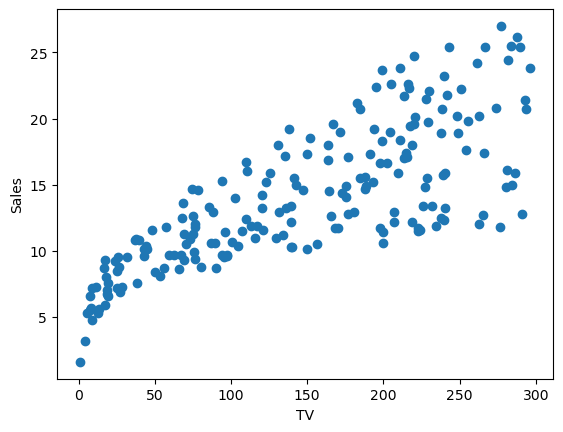

In [7]:
x = ads['TV']
y = ads['sales']
plt.scatter(x,y)
plt.xlabel("TV")
plt.ylabel("Sales")

In [9]:
ads.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x26830730f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2682ba7a510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2683051a410>],
 'medians': [<matplotlib.lines.Line2D at 0x268307336d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26830731a10>],
 'means': []}

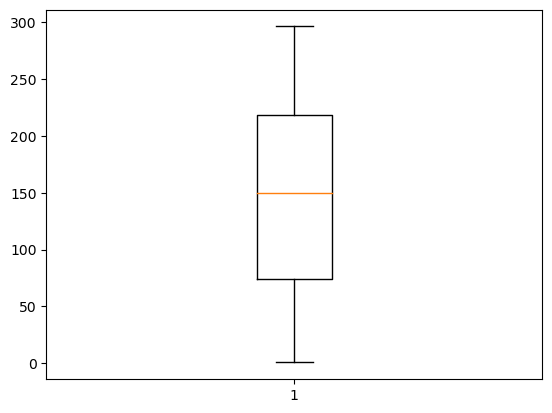

In [11]:
plt.boxplot(ads["TV"])

{'whiskers': [<matplotlib.lines.Line2D at 0x268307970d0>,
 'caps': [<matplotlib.lines.Line2D at 0x268307ac4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26830796910>],
 'medians': [<matplotlib.lines.Line2D at 0x268307ad690>],
 'fliers': [<matplotlib.lines.Line2D at 0x268307adf50>],
 'means': []}

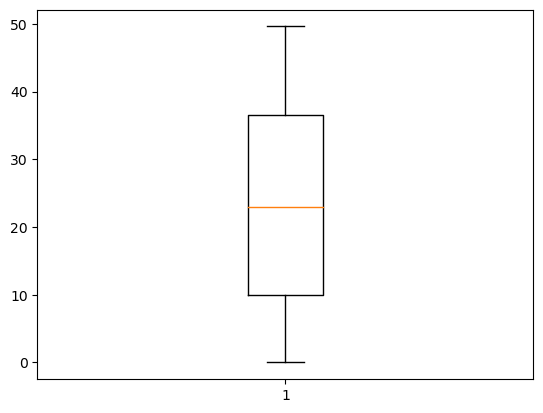

In [13]:
plt.boxplot(ads["radio"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26830671490>,
 'caps': [<matplotlib.lines.Line2D at 0x268307fa8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x268307f8b50>],
 'medians': [<matplotlib.lines.Line2D at 0x268307fb950>],
 'fliers': [<matplotlib.lines.Line2D at 0x268307c93d0>],
 'means': []}

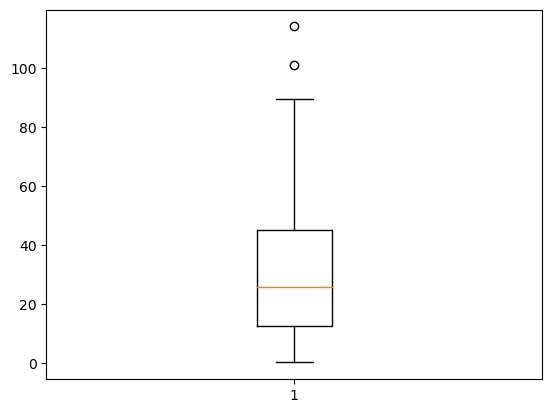

In [14]:
plt.boxplot(ads["newspaper"])

In [15]:
# Data preprocessing steps to be done
#isnull
#correlation
#outliers

In [15]:
x = ads[["TV","radio","newspaper"]]
y=ads["sales"]

In [16]:
y.shape

(200,)

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20)

In [26]:
print("the shape of x_train",x_train.shape)
print("the shape of x_test",x_test.shape)
print("the shape of y_train",y_train.shape)
print("the shape of y_test",y_test.shape)

the shape of x_train (160, 3)
the shape of x_test (40, 3)
the shape of y_train (160, 1)
the shape of y_test (40, 1)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
model = lm.fit(x_train,y_train)

In [30]:
print(lm.coef_)

[[ 0.04587078  0.19529446 -0.00219817]]


In [31]:
print(lm.intercept_)

[2.86512508]


In [33]:
# y = b0 + b1*x1+b2*x2+b3*x3

In [34]:
bzero = 2.86512508
bone = 0.04587078
btwo = 0.19529446
bthree = -0.00219817

In [35]:
y = bzero + bone*57.5 + btwo*32.8 + bthree*23.5

In [36]:
y

11.856696223

In [37]:
y = bzero + bone*214.7 + btwo*24 + bthree*4
y

17.391855906000004

In [38]:
y_pred = lm.predict(x_test)

In [40]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales'] = y_test
new_df['predicted_sales'] = y_pred
new_df

,TV,radio,newspaper,actual sales,predicted_sales
200,232.1,8.6,8.7,13.4,15.172141
110,255.4,26.9,5.5,19.8,19.821853
52,100.4,9.6,3.6,10.7,9.337465
157,93.9,43.5,50.5,15.3,15.556693
171,50.0,11.6,18.4,8.4,7.383633
41,202.5,22.3,31.6,16.6,16.439562
100,135.2,41.7,45.9,17.2,17.109737
164,163.5,36.8,7.4,18.0,17.535567
188,191.1,28.7,18.2,17.3,17.195975
86,193.2,18.4,65.7,15.2,15.176358


In [42]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score()